In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        images=[]
        labels=[]
        reader=csv.reader(training_file)
        next(reader)
        for row in reader:
            labels.append(np.array(row[0]).astype(np.float))
            images.append(np.array(row[1:785]).astype(np.float).reshape((28,28)))
            
        images = np.array(images)
        labels=np.array(labels)
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range = 10,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
    )

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.0)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(25, activation="softmax"),
    
])

# Compile Model. 
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, y=tf.keras.utils.to_categorical(training_labels)),
                              validation_data=validation_datagen.flow(testing_images,
                                                                      y=tf.keras.utils.to_categorical(testing_labels)),
                                                                      epochs=10)

model.evaluate(testing_images, tf.keras.utils.to_categorical(testing_labels), verbose=0)

Epoch 1/10
858/858 [==============================] - 53s 62ms/step - loss: 2.7499 - accuracy: 0.1520 - val_loss: 2.0951 - val_accuracy: 0.2773
Epoch 2/10
858/858 [==============================] - 51s 59ms/step - loss: 1.8635 - accuracy: 0.3782 - val_loss: 1.3565 - val_accuracy: 0.4980
Epoch 3/10
858/858 [==============================] - 50s 59ms/step - loss: 1.4014 - accuracy: 0.5133 - val_loss: 0.9164 - val_accuracy: 0.6620
Epoch 4/10
858/858 [==============================] - 50s 59ms/step - loss: 1.1355 - accuracy: 0.6072 - val_loss: 0.7291 - val_accuracy: 0.7319
Epoch 5/10
858/858 [==============================] - 52s 60ms/step - loss: 0.9699 - accuracy: 0.6622 - val_loss: 0.7061 - val_accuracy: 0.7433
Epoch 6/10
858/858 [==============================] - 51s 59ms/step - loss: 0.8347 - accuracy: 0.7115 - val_loss: 0.5443 - val_accuracy: 0.7803
Epoch 7/10
858/858 [==============================] - 53s 62ms/step - loss: 0.7444 - accuracy: 0.7427 - val_loss: 0.5805 - val_accuracy:

[110.02516035174632, 0.68962634]

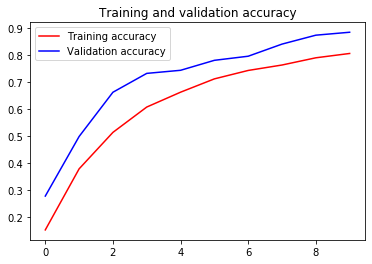

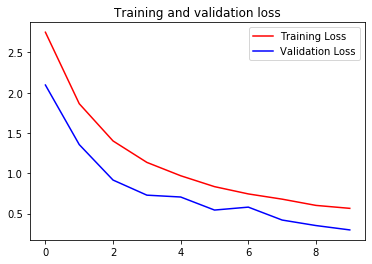

In [5]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [7]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [6]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);